In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from collections import Counter

/Users/alh/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
def GetData2(fileName):
    return read_csv(fileName, header=0)
series = GetData2('/Users/alh/Desktop/MARQ B/Copy of Clients.csv')

In [5]:
series.head()

,Date,Client,Service,Price
0,1/6/17,Jazmine Karin,Press & Curl,55.0
1,1/6/17,Ronisha,Press & Curl,55.0
2,1/7/17,Bria,"Balayage, Press & Curl, Haircut",170.0
3,1/7/17,Ms. Deneen,Press & Curl,55.0
4,1/7/17,Roashon Bell,Shampoo & Style,45.0


In [6]:
series['Price'].mean()

73.114588377723962

In [7]:
series['Price'].sum()

120785.29999999999

In [8]:
series['Date'].value_counts()

5/27/17     10
2/27/20     10
8/30/19      9
3/13/20      9
11/10/18     9
2/16/18      9
10/13/18     9
1/18/20      8
11/15/19     8
12/22/18     8
9/20/19      8
6/6/19       7
9/13/19      7
9/29/18      7
6/10/17      7
2/28/20      7
9/1/17       7
8/16/19      7
3/7/20       7
5/13/17      7
6/21/19      7
12/21/18     7
1/10/20      7
3/11/17      7
11/2/18      7
10/17/19     7
12/31/19     6
3/17/17      6
10/7/17      6
1/3/20       6
            ..
5/9/18       1
11/23/18     1
10/26/17     1
10/31/18     1
5/18/17      1
1/9/17       1
7/23/17      1
7/6/17       1
11/8/17      1
8/20/18      1
11/25/17     1
9/19/19      1
8/11/18      1
9/3/18       1
7/18/18      1
1/25/18      1
6/17/17      1
5/8/19       1
7/25/18      1
1/2/18       1
5/24/17      1
8/24/18      1
2/22/18      1
3/21/18      1
8/29/17      1
1/23/20      1
9/5/19       1
3/7/19       1
12/26/17     1
12/10/18     1
Name: Date, Length: 624, dtype: int64

In [9]:
x=series.groupby('Client', sort=False)


In [10]:
totalbyclient=x.sum()

In [11]:
type(totalbyclient)

pandas.core.frame.DataFrame

In [291]:
totalbyclient.sort_values(by='Price',ascending=False)

,Price
Client,
Roashon Bell,3610.00
Jordyn Jackson,2687.25
Crystal De'Stouet,2303.75
Stephanie Williams,2269.00
Shonda Bard,2255.00
Simone Jones,2145.25
Alysha Bellamy,1817.00
Erica Dixon,1803.00
Sacasha Brown,1710.00


In [12]:
x.apply(lambda x: x.sort_values('Price'))

Date   Price               Service
Client                                                         
Jazmine Karin      28     2/11/17   50.00          Press & Curl
                   53     2/25/17   50.00          Press & Curl
                   86     3/11/17   50.00          Press & Curl
                   223     6/8/17   50.00          Press & Curl
                   269    7/21/17   50.00          Press & Curl
                   513    2/16/18   50.00          Press & Curl
                   0       1/6/17   55.00          Press & Curl
                   1472  12/31/19   55.00          Press & Curl
                   1333  10/24/19   55.00          Press & Curl
                   1242   9/20/19   55.00          Press & Curl
                   1631   3/12/20   55.00          Press & Curl
                   131    4/13/17   60.00          Press & Curl
                   1368   11/7/19   60.00        Color Touch Up
                   624    5/16/18   70.00            Extensions
                   25      2/4/17   90.00   Color, Press & Curl
                   489     2/2/18  150.00                Sew-in
                   1591   2/27/20  250.00            Microlinks
Ronisha            470    1/19/18   50.00          Press & Curl
                   98     3/17/17   50.00          Press & Curl
                   533     3/2/18   50.00          Press & Curl
                   516    2/16/18   50.00          Press & Curl
                   441   12/22/17   50.00          Press & Curl
                   1353   11/1/19   55.00          Mold & Style
                   1319  10/18/19   55.00          Mold & Style
                   1283   10/4/19   55.00          Mold & Style
                   1244   9/20/19   55.00          Mold & Style
                   958     4/4/19   55.00          Mold & Style
                   763   10/13/18   55.00          Mold & Style
                   1       1/6/17   55.00          Press & Curl
                   1451  12/13/19   55.00          Mold & Style
...                           ...     ...                   ...
TyShay O           1562   2/13/20   55.00          Press & Curl
Valerie Morris     1574   2/21/20   90.00             Weave Cap
Peyton             1580   2/26/20   95.00  Masque, Press & Curl
Jessica Jenkins    1583   2/27/20   55.00          Mold & Style
Ari Robinson       1585   2/27/20   55.00            Silk Press
Angelica Houston   1586   2/27/20   63.25            Silk Press
Nada Talley        1587   2/27/20   55.00          Mold & Style
                   1609    3/5/20   55.00          Mold & Style
Ari Talley         1588   2/27/20   55.00            Silk Press
Sharon Thomas      1589   2/27/20   75.00            Microlinks
Tasha Anderson     1590   2/27/20   55.00          Mold & Style
                   1630   3/12/20   55.00          Mold & Style
Etania Behlin      1597   2/28/20  100.00                Marqed
Saddiyyah Benneman 1601   2/29/20   55.00            Silk Press
Raiva Caraballo    1602   2/29/20   90.00                Marqed
Kayanna Jackson    1603   2/29/20   66.00          Mold & Style
Shae Oneal         1604   2/29/20   50.00            Roller Set
Tyshay O           1607    3/5/20   66.00          Press & Curl
Lailaa Ortiz       1613    3/6/20  125.00        Double Process
Hakieya Sims       1624   3/11/20   30.00                   Cut
Raiza              1625   3/11/20   65.00          Mold & Style
Cindy Stransky     1626   3/11/20   70.00               Glue In
Rosemarie Mckenzie 1628   3/11/20   90.00    Press & Curl, Trim
Cierra Williams    1629   3/12/20   90.00                Marqed
Patricia Kuto-Akoi 1632   3/12/20   86.00      Silk Press, Trim
Kellie Livingston  1634   3/13/20   85.00     Cut, Mold & Style
Tiffany P          1645   3/14/20   60.00         Root Touch Up
Viola Kutu-Akoi    1646   3/14/20   85.00                 Color
Tierah Coley       1647   3/16/20   55.00          Mold & Style
Maya Hinton        1648   3/16/20   90.00      Silk Press, Tr

In [13]:
numberofvisits=series.groupby('Client').size()


In [14]:
print(numberofvisits.sort_values(ascending=False))

Client
Roashon Bell           82
Jordyn Jackson         41
Stephanie Williams     41
Shonda Bard            37
Sacasha Brown          35
Crystal De'Stouet      29
Tamisha Thomas         24
Ronisha                23
Amanda Fairbanks       22
Simone Jones           22
Tawanna Scudder        20
Alysha Bellamy         20
Jazmine Karin          17
Janeen Williams        16
Carla Sanders          16
Erica Dixon            16
Dawn Jones             14
Sylvia Thomas Davis    14
Sabrina                13
Tiffany Wilson         13
Dimple Knightner       13
Miranda Johnson        13
Geneva Brown           13
Chanel Jackson         12
Augusta Irele          12
Brierra Poole          12
Taylor Hartsfield      11
Maya Mcilwain          10
Tashira Mason          10
Amber Howard           10
                       ..
Ms. Mable               1
Ms. Wise                1
Mya Flood               1
Nadi Smith              1
Nadirah                 1
Nafesa Stafford         1
Naimael Bey             1
Nanet

In [15]:
y=series.groupby(['Service'])

In [16]:
totalbyservice=y.sum()

In [17]:
totalbyservice.sort_values(by='Price',ascending=False)

,Price
Service,
Press & Curl,26090.40
Mold & Style,16844.05
Marqed,6225.75
"Press & Curl, Trim",4961.50
Shampoo & Style,3650.00
"Cut, Press & Curl",3377.50
Glue In,2924.00
"Color Touch Up, Press & Curl",2881.25
Sew-in,2873.00


In [18]:
from datetime import datetime

In [19]:
series['Date']=pd.to_datetime(series['Date'])

In [20]:
date=series.groupby(['Date'])

In [21]:
totalbydate=date['Price'].sum()

In [22]:
dates=totalbydate.to_frame()

In [23]:
services=date['Service'].sum()

In [24]:
numberofclientsperday=series.groupby('Date').size()

In [25]:
clients=numberofclientsperday.to_frame()

In [26]:
clients.columns=(['Number of Clients'])

In [27]:
servicebydate = pd.concat([totalbydate, services,clients], axis=1, join='inner')


In [28]:
servicebydate.sort_values(by='Price',ascending=False)

,Price,Service,Number of Clients
Date,,,
2019-08-16,823.75,"Glue InDouble Process, Press & CurlDouble Proc...",7
2019-12-07,815.00,"Highlights, Silk Press, TrimProtein Treatment,...",6
2020-02-27,789.25,Silk PressMold & StyleRoot Touch UpSilk PressS...,10
2019-04-26,767.50,"Relaxer, Cut, Press & CurlProtein Treatment, S...",5
2019-09-13,615.00,"Press & CurlHighlights, Press & Curl Protein T...",7
2017-06-10,613.00,"Color (S Hair), MarqedPress & CurlWeave CapCut...",7
2020-01-10,609.00,"Color, CutWeave CapPress & CurlRelaxer, Cut, P...",7
2019-07-27,595.25,"Color, Press & CurlRelaxer, Cut, Shampoo & Blo...",6
2020-03-13,590.50,"Cut, Mold & StyleWeave CapMold & StyleProtein ...",9


In [29]:
servicebydate.plot()

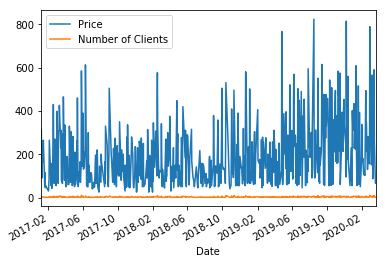

In [30]:
plt.show()

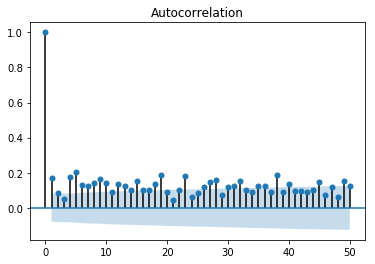

In [31]:
plot_acf(totalbydate, lags=50)
plt.show()

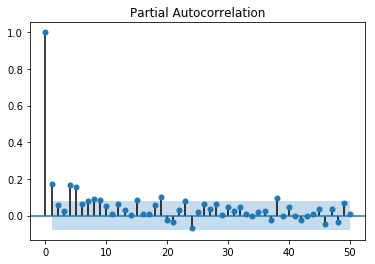

In [32]:
plot_pacf(totalbydate, lags=50)
plt.show()